In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

file = pd.read_csv("Data/UK_cars/toyota.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [2]:
file["model"] = [x.strip() for x in file.model]

In [3]:
mask = (file["model"] == "Aygo")|(file["model"] == "Yaris")
df2 = file.loc[mask,:]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [4]:
df2.groupby("model").agg({"price":"mean"})

,price
model,
Aygo,7905.414584
Yaris,10553.083883


In [5]:
df2.groupby("model").agg({"price":"median"})

,price
model,
Aygo,7895.0
Yaris,10652.5


In [6]:
df2.groupby("model").agg({"price":"var"})

,price
model,
Aygo,2.764884e+06
Yaris,6.608439e+06


In [7]:
df2.groupby("model").agg({"price":"std"})

,price
model,
Aygo,1662.794122
Yaris,2570.688483


<AxesSubplot:xlabel='price', ylabel='Count'>

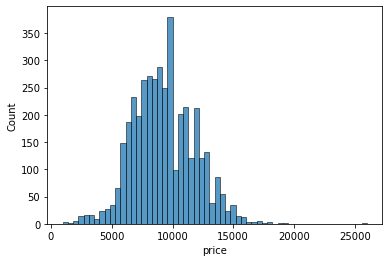

In [8]:
sns.histplot(data=df2, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

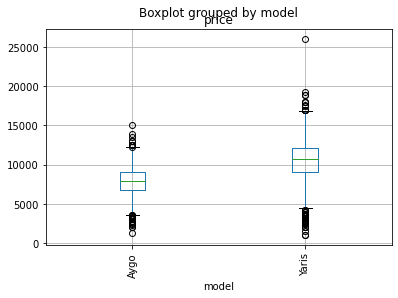

In [9]:
df2.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [10]:
maska = (df2["price"] < 25000) 
df3 = df2.loc[maska,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [119]:
maska = (df2["price"] > 25000) 
df3 = df2.loc[maska,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2627,Yaris,2018,25995,Manual,789,Petrol,145,37.7,1.8


<AxesSubplot:title={'center':'price'}, xlabel='model'>

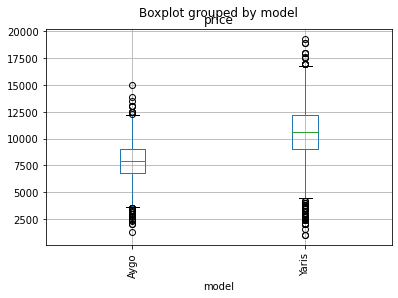

In [11]:
df3.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

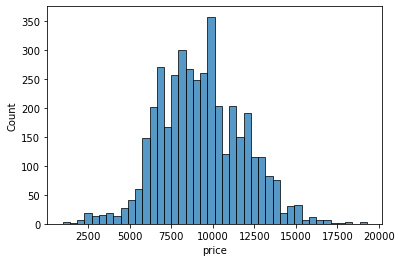

In [12]:
sns.histplot(data=df3, x="price")

In [13]:
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5


In [14]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats



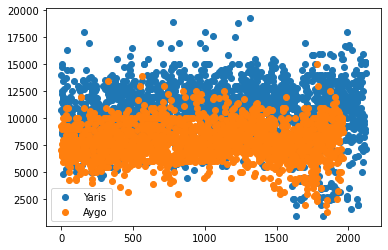

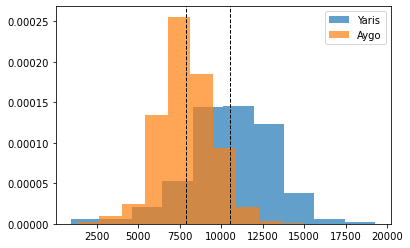

In [15]:
population1a = df3.loc[df3["model"]=="Yaris",:]
population2a= df3.loc[df3["model"]=="Aygo",:]
population1b = population1a["price"]
population2b = population2a["price"]

plt.scatter(range(len(population1b)), population1b, label="Yaris")
plt.scatter(range(len(population2b)), population2b, label="Aygo")
plt.legend()
plt.show()

plt.hist(population1b, 10, density=True, alpha=0.7, label="Yaris")
plt.hist(population2b, 10, density=True, alpha=0.7, label="Aygo")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [16]:
np.mean(population1b)

10545.803394625176

In [17]:
np.mean(population2b)

7905.414584395717

In [18]:
np.var(population1b)

6495961.578036574

In [19]:
np.var(population2b)

2763474.3559117196

In [20]:
stats.ttest_ind(population1b, population2b, equal_var=False)

Ttest_indResult(statistic=39.474492802499356, pvalue=1.8625242244512783e-284)

In [21]:
file2 = pd.read_csv("Data/UK_cars/ford.csv")

file2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [22]:
file2["model"] = [x.strip() for x in file2.model]

In [23]:
maskb = (file2["model"] == "Fiesta")|(file2["model"] == "Focus")
df2b = file2.loc[maskb,:]
df2b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [24]:
df2b.groupby("model").agg({"price":"mean"})

,price
model,
Fiesta,10196.298002
Focus,13185.882956


<AxesSubplot:xlabel='price', ylabel='Count'>

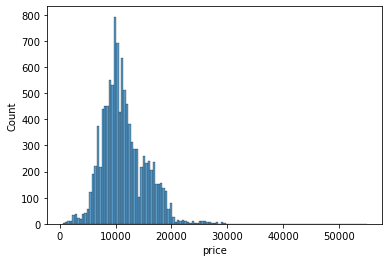

In [25]:
sns.histplot(data=df2b, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

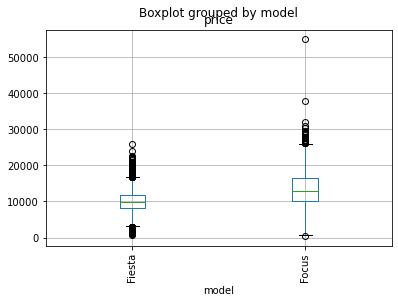

In [26]:
df2b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [27]:
maske = (df2b["price"] < 35000) 
df3b = df2b.loc[maske,:]
df3b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

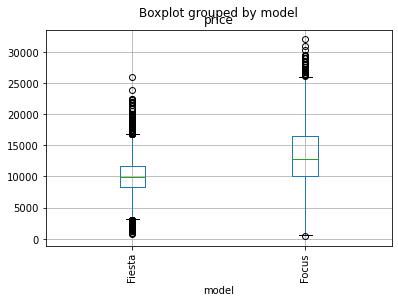

In [28]:
df3b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

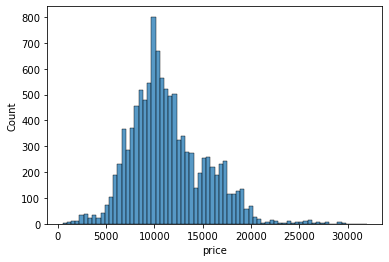

In [29]:
sns.histplot(data=df3b, x="price")

In [30]:
maskh = (((df3b["model"] == "Fiesta") & (df3b["price"] < 20000)) | ((df3b["model"] == "Focus") & (df3b["price"] < 27000)))
df3c = df3b.loc[maskh,:]
df3c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

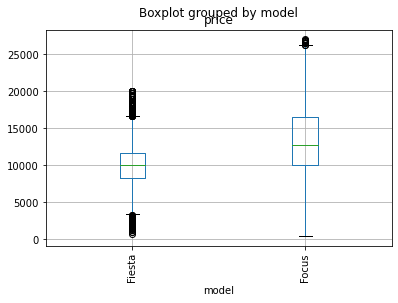

In [31]:
df3c.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

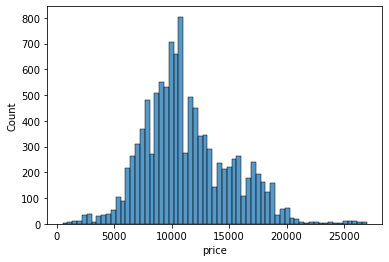

In [32]:
sns.histplot(data=df3c, x="price")

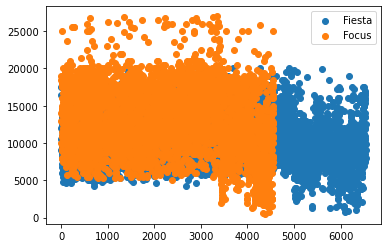

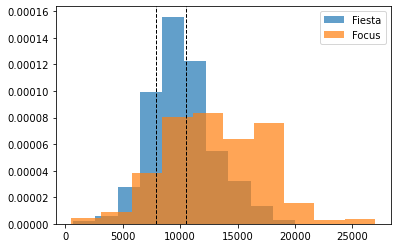

In [33]:
population1c =  df3c.loc[df3c["model"]=="Fiesta",:]
population2c= df3c.loc[df3c["model"]=="Focus",:]
population1d = population1c["price"]
population2d = population2c["price"]

plt.scatter(range(len(population1d)), population1d, label="Fiesta")
plt.scatter(range(len(population2d)), population2d, label="Focus")
plt.legend()
plt.show()

plt.hist(population1d, 10, density=True, alpha=0.7, label="Fiesta")
plt.hist(population2d, 10, density=True, alpha=0.7, label="Focus")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [34]:
np.mean(population1d)

10165.540366972476

In [35]:
np.mean(population2d)

13083.716885964912

In [36]:
np.var(population1d)

7997103.740113615

In [37]:
np.var(population2d)

18576801.28234644

In [38]:
stats.ttest_ind(population1d, population2d, equal_var=False)

Ttest_indResult(statistic=-40.09278905193241, pvalue=0.0)

In [39]:
Toyota = df3
Ford = df3c
list_of_dataframes = [Toyota, Ford]

In [40]:
df_cars = pd.concat(list_of_dataframes, ignore_index=True)
df_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


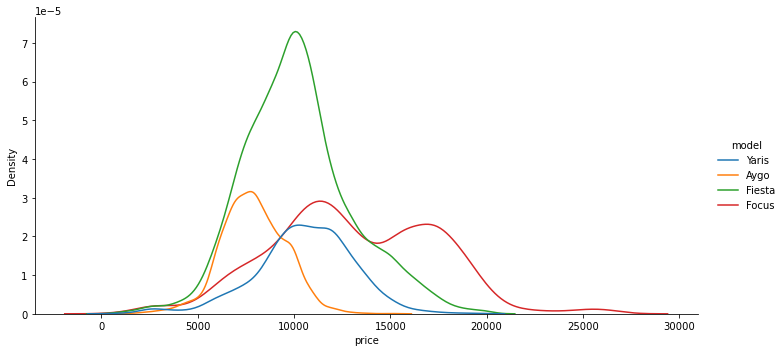

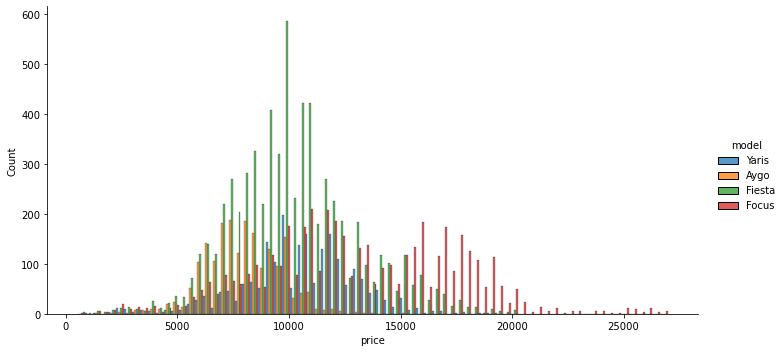

In [41]:
#https://towardsdatascience.com/anova-test-with-python-cfbf4013328b
# import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
sns.displot(df_cars,x='price',hue='model',kind='kde',height=5,aspect=2)
sns.displot(df_cars,x='price',hue='model',multiple='dodge',height=5,aspect=2)

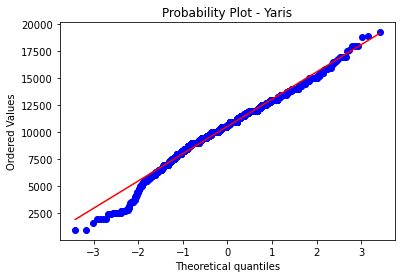

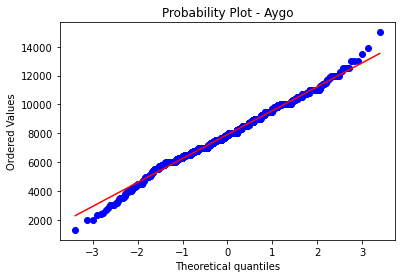

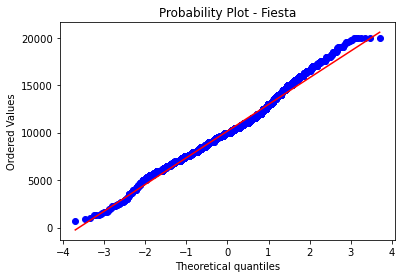

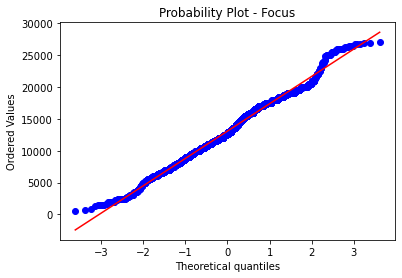

In [42]:
models = df_cars['model'].unique()
for model in models:
    stats.probplot(df_cars[df_cars['model'] == model]['price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  model)
    plt.show()


In [43]:
ratio = df_cars.groupby('model').std().max() / df_cars.groupby('model').std().min()
ratio

year           1.286459
price          2.592356
mileage        1.457784
tax            1.104532
mpg            2.274465
engineSize    10.014912
dtype: float64

In [44]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df_cars['price'].mean()
SSTR = df_cars.groupby('model').count() * (df_cars.groupby('model').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['price'].sum()

# calculate SSE and update anova table
SSE = (df_cars.groupby('model').count() - 1) * df_cars.groupby('model').std()**2
anova_table['SS']['Within Groups'] = SSE['price'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['price'].sum() + SSE['price'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df_cars['model'].nunique() - 1
anova_table['df']['Within Groups'] = df_cars.shape[0] - df_cars['model'].nunique()
anova_table['df']['Total'] =df_cars.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,42982035287.977989,3,14327345095.992662,1392.117656,0.0,3.116992
Within Groups,156208380026.801056,15178,10291763.079905,,,
Total,199190415314.779053,15181,13121033.878847,,,


In [45]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1392.1176561056866  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


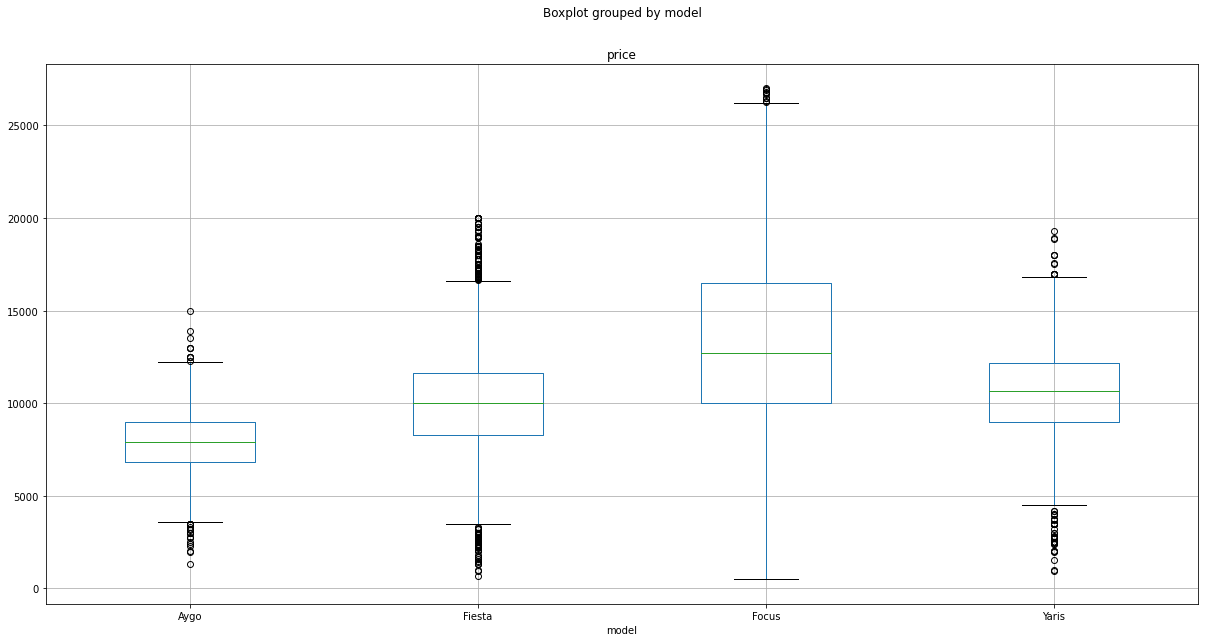

In [46]:
df_cars.boxplot("price", by="model", figsize=(20, 10))
plt.show()

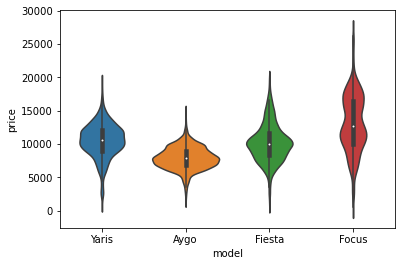

In [47]:
sns.violinplot(data=df_cars, x="model", y="price")
plt.show()

In [48]:
df_cars.groupby("model").agg({"price": ["mean", "std", "var", "count"]}, axis=1)

price                                 
                mean          std           var count
model                                                
Aygo     7905.414584  1662.794122  2.764884e+06  1961
Fiesta  10165.540367  2828.131313  7.998327e+06  6540
Focus   13083.716886  4310.554029  1.858088e+07  4560
Yaris   10545.803395  2549.318676  6.499026e+06  2121

In [49]:
group1 = df_cars[df_cars["model"] == "Aygo"]["price"]
group2 = df_cars[df_cars["model"] == "Fiesta"]["price"]
group3 = df_cars[df_cars["model"] == "Focus"]["price"]
group4 = df_cars[df_cars["model"] == "Yaris"]["price"]

In [50]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=1392.1176561056843, pvalue=0.0)

In [51]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=True))
print(stats.ttest_ind(group1, group4, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=True))

print(stats.ttest_ind(group3, group4, equal_var=False))




Ttest_indResult(statistic=-44.046727046413544, pvalue=0.0)
Ttest_indResult(statistic=-51.57138560900871, pvalue=0.0)
Ttest_indResult(statistic=-39.474492802499356, pvalue=1.8625242244512783e-284)
Ttest_indResult(statistic=-40.09278905193241, pvalue=0.0)
Ttest_indResult(statistic=-5.508856413435533, pvalue=3.715226414598675e-08)
Ttest_indResult(statistic=30.037347629841285, pvalue=2.113110310686985e-185)


In [52]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15182 non-null  object 
 1   year          15182 non-null  int64  
 2   price         15182 non-null  int64  
 3   transmission  15182 non-null  object 
 4   mileage       15182 non-null  int64  
 5   fuelType      15182 non-null  object 
 6   tax           15182 non-null  int64  
 7   mpg           15182 non-null  float64
 8   engineSize    15182 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [53]:
df_cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,15182.000000,15182.000000,15182.000000,15182.000000,15182.000000,15182.000000
mean,2016.877289,10803.224213,21830.551904,100.573376,61.386688,1.207575
std,2.056196,3622.296768,17557.438461,65.586757,9.292117,0.295449
min,1998.000000,495.000000,1.000000,0.000000,26.300000,0.000000
25%,2016.000000,8298.000000,9782.000000,20.000000,56.500000,1.000000
50%,2017.000000,10298.000000,17250.000000,145.000000,60.100000,1.000000
75%,2018.000000,12698.000000,29294.250000,145.000000,65.700000,1.500000
max,2060.000000,26995.000000,177644.000000,330.000000,88.300000,2.500000


In [54]:
unique = df_cars["year"].unique()
unique

array([2019, 2018, 2016, 2014, 2017, 2020, 2013, 2015, 2009, 2007, 2008,
       2002, 1999, 2012, 2011, 2010, 2005, 2000, 2003, 2006, 2004, 1998,
       2060], dtype=int64)

In [55]:
maskb = df_cars["year"] == 2060
df_carsb = df_cars.loc[maskb,:]
df_carsb

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
15060,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [56]:
maskc = df_cars["year"] != 2060
df_carsc = df_cars.loc[maskc,:]
df_carsc

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [57]:
unique = df_carsc["year"].unique()
unique

array([2019, 2018, 2016, 2014, 2017, 2020, 2013, 2015, 2009, 2007, 2008,
       2002, 1999, 2012, 2011, 2010, 2005, 2000, 2003, 2006, 2004, 1998],
      dtype=int64)

<AxesSubplot:xlabel='year', ylabel='Count'>

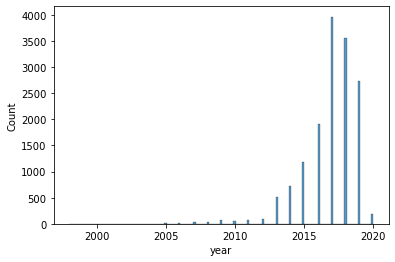

In [58]:
sns.histplot(data=df_carsc, x="year")

In [59]:
count = df_carsc["year"].value_counts()
count

2017    3967
2018    3562
2019    2744
2016    1913
2015    1178
2014     725
2013     514
2020     181
2012      96
2009      73
2011      70
2010      45
2008      43
2007      29
2005      13
2006      13
2004       4
2003       4
2002       3
2000       2
1999       1
1998       1
Name: year, dtype: int64

In [60]:
maskd = ((df_carsc["year"] == 2017)|(df_carsc["year"] == 2018)|(df_carsc["year"] == 2019)|(df_carsc["year"] == 2016)|(df_carsc["year"] == 2015)|(df_carsc["year"] == 2014)|(df_carsc["year"] == 2013)|(df_carsc["year"] == 2020))
df_carsd = df_carsc.loc[maskd,:]
df_carsd

     

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [61]:
count = df_carsd["year"].value_counts()
count

2017    3967
2018    3562
2019    2744
2016    1913
2015    1178
2014     725
2013     514
2020     181
Name: year, dtype: int64

<AxesSubplot:xlabel='mileage', ylabel='Count'>

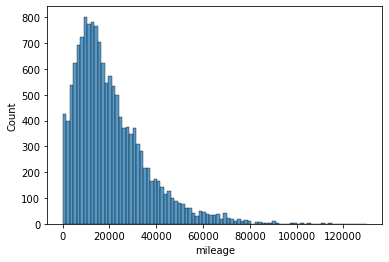

In [62]:
sns.histplot(data=df_carsd, x="mileage")

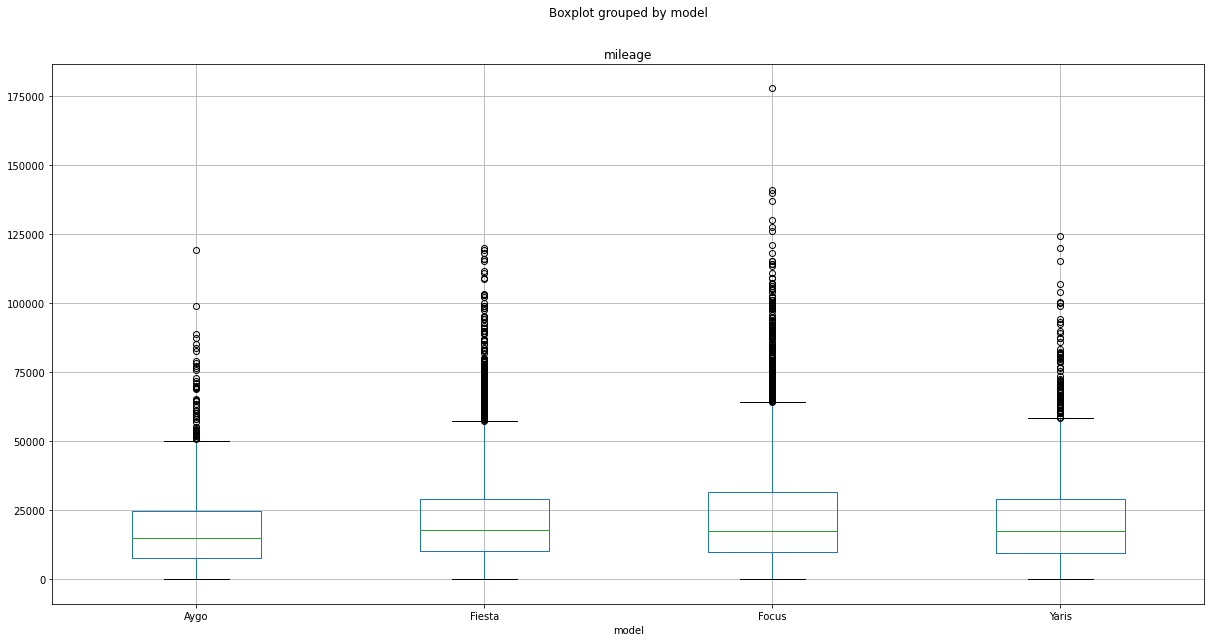

In [63]:
df_cars.boxplot("mileage", by="model", figsize=(20, 10))
plt.show()

In [64]:
mask2 = ((df_carsd["model"] == "Aygo") & (df_carsd["mileage"] < 75000)) 
df3 = df_carsd.loc[mask2,:]
#df3.reset_index(drop=True, inplace=True)
# df3.columns =[]
df3

mask3 = ((df_carsd["model"] == "Yaris") & (df_carsd["mileage"] < 75000)) 
df4 = df_carsd.loc[mask3,:]
#df4.reset_index(drop=True, inplace=True)
# df4.columns =[]
df4

mask4 = ((df_carsd["model"] == "Fiesta") & (df_carsd["mileage"] < 75000)) 
df5 = df_carsd.loc[mask4,:]
#df5.reset_index(drop=True, inplace=True)
# df5.columns =[]
df5

mask5 = ((df_carsd["model"] == "Focus") & (df_carsd["mileage"] < 75000)) 
df6 = df_carsd.loc[mask5,:]
#df6.reset_index(drop=True, inplace=True)
# df6.columns =[]
df6

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4083,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
4084,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
4089,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
4098,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
4104,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
15166,Focus,2017,18500,Manual,10960,Petrol,145,41.5,2.0
15168,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
15173,Focus,2015,8000,Manual,65000,Diesel,0,74.3,1.5
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


<AxesSubplot:title={'center':'mileage'}, xlabel='model'>

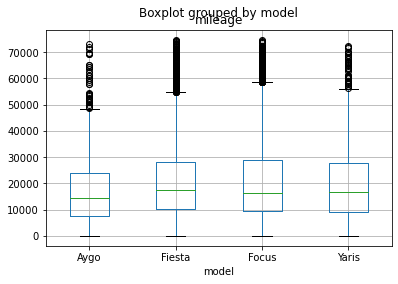

In [65]:
list_of_dataframes = [df3, df4, df5,df6]
dfb = pd.concat(list_of_dataframes)



dfb.boxplot(by ='model', column =["mileage"], grid = True)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

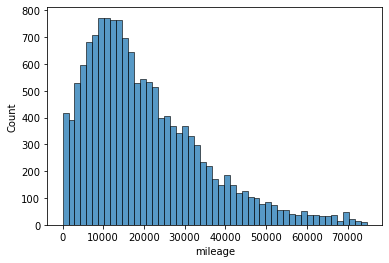

In [66]:
sns.histplot(data=dfb, x="mileage")

In [67]:
# Determine outliers using upper and lower bounds
import numpy as np
Q3a = np.quantile(df3["mileage"], 0.75)
Q1a = np.quantile(df3["mileage"], 0.25)
IQRa = Q3a-Q1a
lower_range_a = Q1a - 1.5 * IQRa
upper_range_a = Q3a + 1.5 * IQRa

Q3b = np.quantile(df4["mileage"], 0.75)
Q1b = np.quantile(df4["mileage"], 0.25)
IQRb = Q3b-Q1b
lower_range_b = Q1b - 1.5 * IQRb
upper_range_b = Q3b + 1.5 * IQRb

Q3c = np.quantile(df5["mileage"], 0.75)
Q1c = np.quantile(df5["mileage"], 0.25)
IQRc = Q3c-Q1c
lower_range_c = Q1c - 1.5 * IQRc
upper_range_c = Q3c + 1.5 * IQRc

Q3d = np.quantile(df6["mileage"], 0.75)
Q1d = np.quantile(df6["mileage"], 0.25)
IQRd = Q3d-Q1d
lower_range_d = Q1d - 1.5 * IQRd
upper_range_d = Q3d + 1.5 * IQRd


mask6 = ((df3["mileage"] < lower_range_a) | (df3["mileage"] > upper_range_a))
outliers_a = df3.loc[mask6,:]

outliers_a

mask7 = ((df4["mileage"] < lower_range_b) | (df4["mileage"] > upper_range_b))
outliers_b = df4.loc[mask7,:]

outliers_b

mask8 = ((df5["mileage"] < lower_range_c) | (df5["mileage"] > upper_range_c))
outliers_c = df5.loc[mask8,:]

outliers_c

mask9 = ((df6["mileage"] < lower_range_d) | (df6["mileage"] > upper_range_d))
outliers_d = df6.loc[mask9,:]

outliers_d.sort_values("mileage")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13081,Focus,2013,5995,Manual,58610,Petrol,145,47.9,1.6
5732,Focus,2016,13240,Automatic,58644,Diesel,30,61.4,2.0
14765,Focus,2015,11495,Manual,58655,Diesel,20,67.3,2.0
14675,Focus,2016,8750,Manual,58665,Diesel,0,74.3,1.5
5239,Focus,2016,8000,Manual,58774,Diesel,0,74.3,1.5
...,...,...,...,...,...,...,...,...,...
5637,Focus,2013,5971,Manual,73411,Diesel,20,67.3,1.6
7549,Focus,2015,7500,Manual,73831,Diesel,0,74.3,1.5
9707,Focus,2013,4995,Manual,74015,Diesel,20,67.3,1.6
13994,Focus,2015,7099,Manual,74176,Diesel,0,74.3,1.5


In [68]:
mask2 = ((df_carsd["model"] == "Aygo") & (df_carsd["mileage"] < 48653)) 
df3 = df_carsd.loc[mask2,:]
#df3.reset_index(drop=True, inplace=True)
# df3.columns =[]
df3

mask3 = ((df_carsd["model"] == "Yaris") & (df_carsd["mileage"] < 56307)) 
df4 = df_carsd.loc[mask3,:]
#df4.reset_index(drop=True, inplace=True)
# df4.columns =[]
df4

mask4 = ((df_carsd["model"] == "Fiesta") & (df_carsd["mileage"] < 54927)) 
df5 = df_carsd.loc[mask4,:]
#df5.reset_index(drop=True, inplace=True)
# df5.columns =[]
df5

mask5 = ((df_carsd["model"] == "Focus") & (df_carsd["mileage"] < 58610)) 
df6 = df_carsd.loc[mask5,:]
#df6.reset_index(drop=True, inplace=True)
# df6.columns =[]
df6

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4083,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
4084,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
4089,Focus,2018,10000,Manual,48141,Petrol,145,61.4,1.0
4098,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
4104,Focus,2019,18990,Manual,8400,Petrol,145,60.1,1.0
...,...,...,...,...,...,...,...,...,...
15164,Focus,2018,14000,Manual,8724,Diesel,145,74.3,1.5
15166,Focus,2017,18500,Manual,10960,Petrol,145,41.5,2.0
15168,Focus,2017,11000,Manual,17339,Petrol,145,60.1,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0


<AxesSubplot:title={'center':'mileage'}, xlabel='model'>

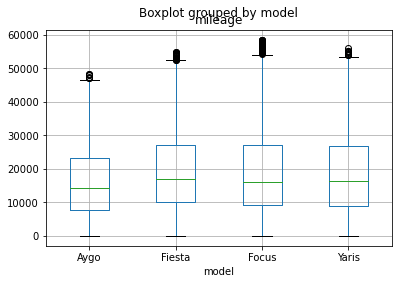

In [69]:
list_of_dataframes = [df3, df4, df5,df6]
dfb = pd.concat(list_of_dataframes)



dfb.boxplot(by ='model', column =["mileage"], grid = True)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

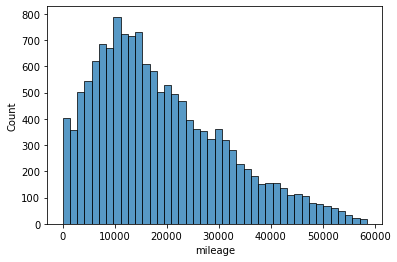

In [70]:
sns.histplot(data=dfb, x="mileage")

<AxesSubplot:xlabel='tax', ylabel='Count'>

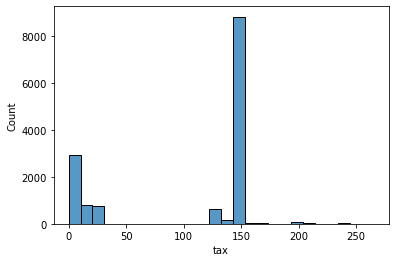

In [71]:
sns.histplot(data=dfb, x="tax")

<AxesSubplot:xlabel='mpg', ylabel='Count'>

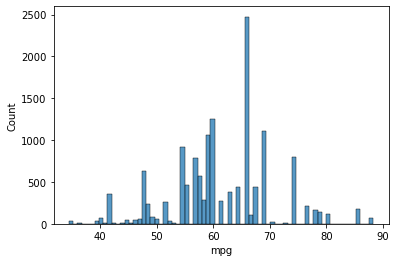

In [72]:
sns.histplot(data=dfb, x="mpg")

<AxesSubplot:xlabel='engineSize', ylabel='Count'>

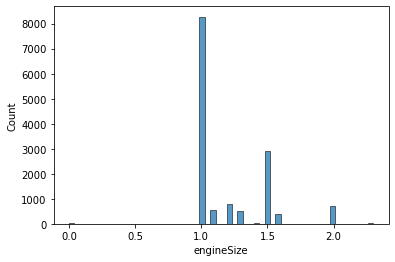

In [73]:
sns.histplot(data=dfb, x="engineSize")

In [74]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14266 entries, 2121 to 15181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         14266 non-null  object 
 1   year          14266 non-null  int64  
 2   price         14266 non-null  int64  
 3   transmission  14266 non-null  object 
 4   mileage       14266 non-null  int64  
 5   fuelType      14266 non-null  object 
 6   tax           14266 non-null  int64  
 7   mpg           14266 non-null  float64
 8   engineSize    14266 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.6+ MB


In [75]:
dfb.model.unique()

array(['Aygo', 'Yaris', 'Fiesta', 'Focus'], dtype=object)

In [76]:
dfb.transmission.unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype=object)

In [77]:
dfb.fuelType.unique()

array(['Other', 'Petrol', 'Hybrid', 'Diesel'], dtype=object)

<AxesSubplot:xlabel='price', ylabel='Count'>

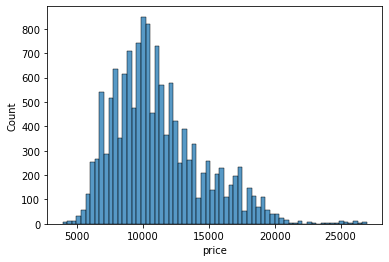

In [112]:
sns.histplot(data=dfb, x="price")

In [115]:
corrs = dfb.corr()
corrs

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636536,-0.660621,0.643684,-0.202957,-0.100257
price,0.636536,1.000000,-0.516829,0.462786,-0.299283,0.333518
mileage,-0.660621,-0.516829,1.000000,-0.455686,0.247953,0.126194
tax,0.643684,0.462786,-0.455686,1.000000,-0.427164,0.037269
mpg,-0.202957,-0.299283,0.247953,-0.427164,1.000000,-0.098421
engineSize,-0.100257,0.333518,0.126194,0.037269,-0.098421,1.000000


In [117]:
dfb.to_csv("clean_data.csv")


<AxesSubplot:xlabel='year', ylabel='Count'>

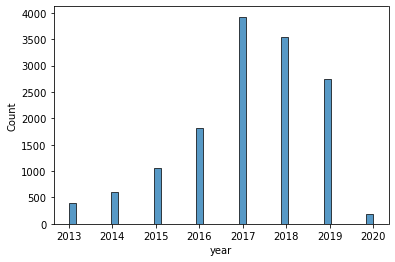

In [159]:
sns.histplot(data=dfb, x="year")

In [165]:
bins = [0, 2014, 2016, 2017, 2018, 99999999]

# Create labels for these bins
group_labels = ["2013_14", "2015_16", "2017", "2018","2019_20"]

In [166]:
dfb["Years"] = pd.cut(dfb.year, bins, labels=group_labels, include_lowest=True)
dfb.head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Years
2121,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0,2017
2122,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0,2017
2123,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0,2015_16
2124,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0,2017
2125,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0,2015_16
2126,Aygo,2015,6495,Manual,33931,Petrol,0,69.0,1.0,2015_16
2127,Aygo,2018,8998,Semi-Auto,19885,Petrol,145,67.3,1.0,2018
2128,Aygo,2017,6998,Manual,36975,Petrol,145,68.9,1.0,2017
2130,Aygo,2017,7498,Manual,40405,Petrol,145,68.9,1.0,2017
2131,Aygo,2017,6800,Manual,32725,Petrol,145,68.9,1.0,2017


<AxesSubplot:xlabel='Years', ylabel='Count'>

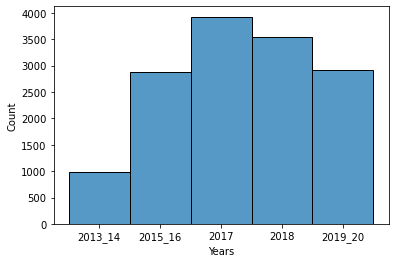

In [167]:
sns.histplot(data=dfb, x="Years")

<AxesSubplot:xlabel='price', ylabel='Count'>

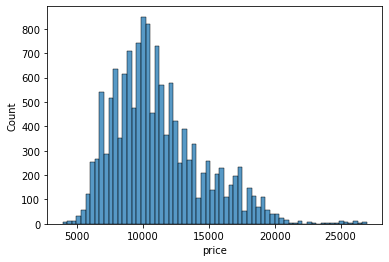

In [168]:
sns.histplot(data=dfb, x="price")

Text(0, 0.5, 'Price')

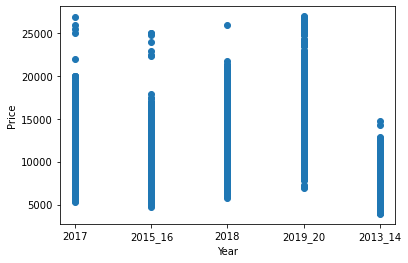

In [169]:
plt.scatter(dfb["Years"],dfb["price"])
plt.xlabel('Year')
plt.ylabel('Price')

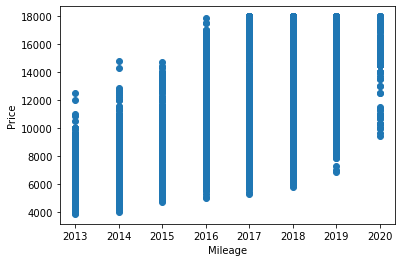

In [171]:
x_values = df9['year']
y_values = df9['price']
plt.scatter(x_values,y_values)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [172]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [173]:
linregress(x_values, y_values)

LinregressResult(slope=1258.3573648282431, intercept=-2527467.0233321795, rvalue=0.6506623276399944, pvalue=0.0, stderr=12.555250170540786, intercept_stderr=25325.216656408254)

In [174]:
preds = x_values * slope + intercept

preds

2121    10639.781526
2122    10639.781526
2123     9381.424162
2124    10639.781526
2125     9381.424162
            ...     
2116    10639.781526
2117    13156.496256
2118     5606.352067
2119     6864.709432
2120    13156.496256
Name: year, Length: 13684, dtype: float64

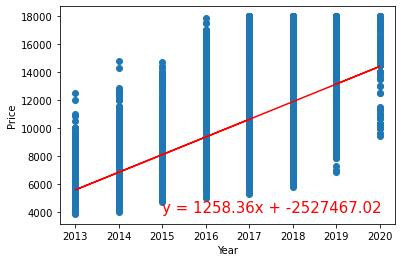

In [209]:
x_values = df9['year']
y_values = df9['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2015,4000),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

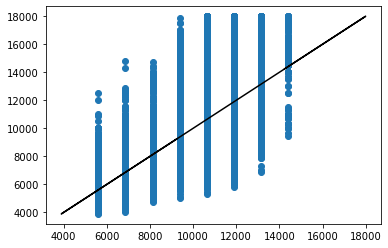

In [176]:
plt.scatter(preds, y_values)
plt.plot(y_values, y_values, color="black")
plt.show()

In [206]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [208]:
reg = LinearRegression()

In [ ]:
reg.fit(np.array(df9['year']), np)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

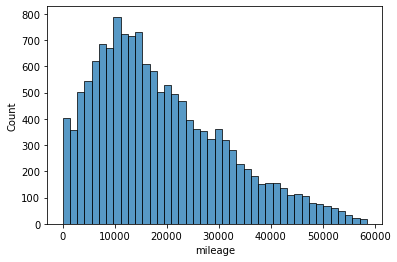

In [128]:
sns.histplot(data=dfb, x="mileage")

Text(0, 0.5, 'Price')

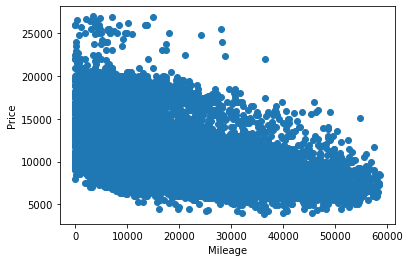

In [131]:
plt.scatter(dfb["mileage"],dfb["price"])
plt.xlabel('Mileage')
plt.ylabel('Price')

In [132]:
dfb.describe()

,year,price,mileage,tax,mpg,engineSize
count,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000,14266.000000
mean,2017.161713,11140.199355,18815.673840,102.319150,61.495205,1.196355
std,1.530618,3431.543658,12425.640064,64.202458,9.064621,0.292362
min,2013.000000,3891.000000,1.000000,0.000000,34.500000,0.000000
25%,2016.000000,8695.000000,9283.250000,20.000000,56.500000,1.000000
50%,2017.000000,10498.000000,16224.000000,145.000000,60.100000,1.000000
75%,2018.000000,12995.000000,26530.250000,145.000000,65.700000,1.500000
max,2020.000000,26995.000000,58500.000000,265.000000,88.300000,2.300000


<AxesSubplot:title={'center':'mileage'}, xlabel='model'>

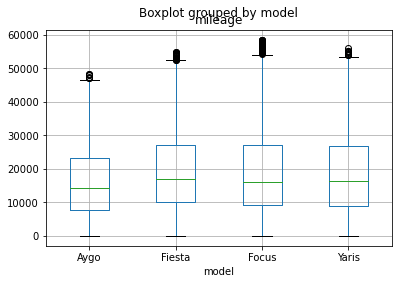

In [133]:
dfb.boxplot(by ='model', column =["mileage"], grid = True)

In [139]:
maska = (dfb["model"] == "Aygo")& (dfb["mileage"] < (18815.67+(2*12425.6))) 
df5 = dfb.loc[maska,:]
df5

maska = (dfb["model"] == "Fiesta")& (dfb["mileage"] < (18815.67+(2*12425.6))) 
df6 = dfb.loc[maska,:]
df6

maska = (dfb["model"] == "Focus")& (dfb["mileage"] < (18815.67+(2*12425.6))) 
df7 = dfb.loc[maska,:]
df7

maska = (dfb["model"] == "Yaris")& (dfb["mileage"] < (18815.67+(2*12425.6))) 
df8 = dfb.loc[maska,:]
df8

list_of_dataframes = [df5, df6, df7, df8]

df9 = pd.concat(list_of_dataframes)
df9

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2121,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
2122,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2123,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
2124,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
2125,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0
...,...,...,...,...,...,...,...,...,...
2116,Yaris,2017,8995,Manual,21049,Petrol,30,58.0,1.3
2117,Yaris,2019,15251,Automatic,4144,Hybrid,135,76.3,1.5
2118,Yaris,2013,8695,Automatic,39364,Petrol,30,55.4,1.3
2119,Yaris,2014,7200,Manual,28801,Petrol,30,58.9,1.0


In [178]:
maska = (dfb["model"] == "Aygo")& (dfb["price"] < (11140.20+(2*3431.54))) 
df5 = dfb.loc[maska,:]
df5

maska = (dfb["model"] == "Fiesta")& (dfb["price"] < (11140.20+(2*3431.54))) 
df6 = dfb.loc[maska,:]
df6

maska = (dfb["model"] == "Focus")& (dfb["price"] < (11140.20+(2*3431.54))) 
df7 = dfb.loc[maska,:]
df7

maska = (dfb["model"] == "Yaris")& (dfb["price"] < (11140.20+(2*3431.54))) 
df8 = dfb.loc[maska,:]
df8

list_of_dataframes = [df5, df6, df7, df8]

df9 = pd.concat(list_of_dataframes)
df9

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Years
2121,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0,2017
2122,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0,2017
2123,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0,2015_16
2124,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0,2017
2125,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0,2015_16
...,...,...,...,...,...,...,...,...,...,...
2116,Yaris,2017,8995,Manual,21049,Petrol,30,58.0,1.3,2017
2117,Yaris,2019,15251,Automatic,4144,Hybrid,135,76.3,1.5,2019_20
2118,Yaris,2013,8695,Automatic,39364,Petrol,30,55.4,1.3,2013_14
2119,Yaris,2014,7200,Manual,28801,Petrol,30,58.9,1.0,2013_14


<AxesSubplot:xlabel='year', ylabel='Count'>

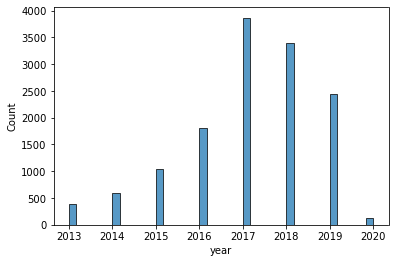

In [179]:
sns.histplot(data=df9, x="year")

<AxesSubplot:xlabel='price', ylabel='Count'>

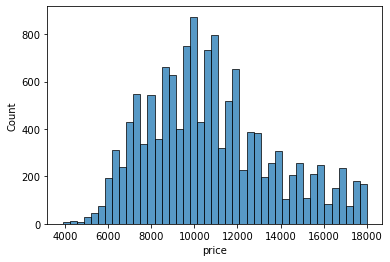

In [180]:
sns.histplot(data=df9, x="price")

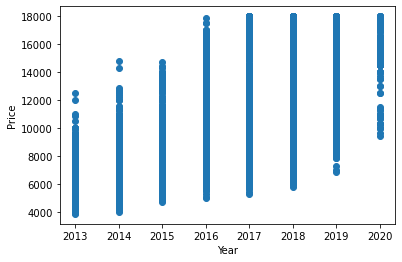

In [182]:
x_values = df9['year']
y_values = df9['price']
plt.scatter(x_values,y_values)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [183]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [184]:
linregress(x_values, y_values)

LinregressResult(slope=1258.3573648282431, intercept=-2527467.0233321795, rvalue=0.6506623276399944, pvalue=0.0, stderr=12.555250170540786, intercept_stderr=25325.216656408254)

In [185]:
preds = x_values * slope + intercept

preds

2121    10639.781526
2122    10639.781526
2123     9381.424162
2124    10639.781526
2125     9381.424162
            ...     
2116    10639.781526
2117    13156.496256
2118     5606.352067
2119     6864.709432
2120    13156.496256
Name: year, Length: 13684, dtype: float64

In [194]:
corrs2 = df9.corr()
corrs2

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.650662,-0.648883,0.640863,-0.186558,-0.164836
price,0.650662,1.000000,-0.515019,0.463395,-0.219018,0.198578
mileage,-0.648883,-0.515019,1.000000,-0.445934,0.233345,0.191603
tax,0.640863,0.463395,-0.445934,1.000000,-0.422869,-0.014924
mpg,-0.186558,-0.219018,0.233345,-0.422869,1.000000,0.000813
engineSize,-0.164836,0.198578,0.191603,-0.014924,0.000813,1.000000


The r-value is: 0.6506623276393552


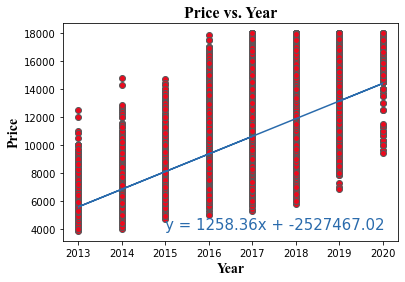

In [213]:
r8 = corrs2.iloc[1]["year"]
print(f"The r-value is: {r8}")

x_values = df9['year']
y_values = df9['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="#EB0A1E", edgecolors="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(2015,4000),fontsize=15,color="#2A6BAC")
plt.title("Price vs. Year", fontsize=16, fontweight="bold", fontname="Times New Roman")
plt.xlabel('Year', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.ylabel('Price', fontsize=14, fontweight="bold", fontname="Times New Roman")
plt.show()



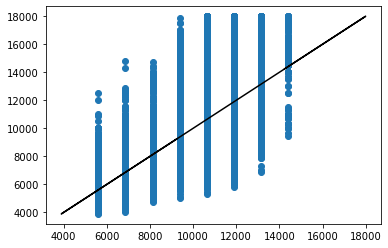

In [192]:
plt.scatter(preds, y_values)
plt.plot(y_values, y_values, color="black")
plt.show()

In [126]:
import statsmodels.api as sm

In [177]:
X = df9['year']
X = sm.add_constant(X) # adding a constant

y = df9['price']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.005e+04
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:44:28   Log-Likelihood:            -1.2496e+05
No. Observations:               13684   AIC:                         2.499e+05
Df Residuals:                   13682   BIC:                         2.499e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.527e+06   2.53e+04    -99.800      0.0

In [78]:
#https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a
status = pd.get_dummies(dfb['model'])
status

,Aygo,Fiesta,Focus,Yaris
2121,1,0,0,0
2122,1,0,0,0
2123,1,0,0,0
2124,1,0,0,0
2125,1,0,0,0
...,...,...,...,...
15164,0,0,1,0
15166,0,0,1,0
15168,0,0,1,0
15178,0,0,1,0


In [79]:
status = pd.get_dummies(dfb['model'], drop_first = True)
status

,Fiesta,Focus,Yaris
2121,0,0,0
2122,0,0,0
2123,0,0,0
2124,0,0,0
2125,0,0,0
...,...,...,...
15164,0,1,0
15166,0,1,0
15168,0,1,0
15178,0,1,0


In [80]:
dfc = pd.concat([dfb, status], axis = 1)

dfc.drop(['model'], axis = 1, inplace = True)

dfc

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Fiesta,Focus,Yaris
2121,2017,9250,Manual,4414,Other,150,68.9,1.0,0,0,0
2122,2017,7100,Manual,32351,Petrol,0,68.9,1.0,0,0,0
2123,2016,6500,Manual,26193,Petrol,0,69.0,1.0,0,0,0
2124,2017,7650,Manual,12134,Petrol,0,68.9,1.0,0,0,0
2125,2016,6999,Manual,21123,Petrol,0,69.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15164,2018,14000,Manual,8724,Diesel,145,74.3,1.5,0,1,0
15166,2017,18500,Manual,10960,Petrol,145,41.5,2.0,0,1,0
15168,2017,11000,Manual,17339,Petrol,145,60.1,1.0,0,1,0
15178,2016,16000,Manual,19834,Petrol,200,41.5,2.0,0,1,0


In [81]:
statusb = pd.get_dummies(dfc['transmission'])
statusb

,Automatic,Manual,Other,Semi-Auto
2121,0,1,0,0
2122,0,1,0,0
2123,0,1,0,0
2124,0,1,0,0
2125,0,1,0,0
...,...,...,...,...
15164,0,1,0,0
15166,0,1,0,0
15168,0,1,0,0
15178,0,1,0,0


In [82]:
statusb = pd.get_dummies(dfc['transmission'], drop_first = True)
statusb

,Manual,Other,Semi-Auto
2121,1,0,0
2122,1,0,0
2123,1,0,0
2124,1,0,0
2125,1,0,0
...,...,...,...
15164,1,0,0
15166,1,0,0
15168,1,0,0
15178,1,0,0


In [83]:
dfd = pd.concat([dfc, statusb], axis = 1)

dfd.drop(['transmission'], axis = 1, inplace = True)

dfd

,year,price,mileage,fuelType,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other,Semi-Auto
2121,2017,9250,4414,Other,150,68.9,1.0,0,0,0,1,0,0
2122,2017,7100,32351,Petrol,0,68.9,1.0,0,0,0,1,0,0
2123,2016,6500,26193,Petrol,0,69.0,1.0,0,0,0,1,0,0
2124,2017,7650,12134,Petrol,0,68.9,1.0,0,0,0,1,0,0
2125,2016,6999,21123,Petrol,0,69.0,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15164,2018,14000,8724,Diesel,145,74.3,1.5,0,1,0,1,0,0
15166,2017,18500,10960,Petrol,145,41.5,2.0,0,1,0,1,0,0
15168,2017,11000,17339,Petrol,145,60.1,1.0,0,1,0,1,0,0
15178,2016,16000,19834,Petrol,200,41.5,2.0,0,1,0,1,0,0


In [84]:
statusc = pd.get_dummies(dfd['fuelType'])
statusc

,Diesel,Hybrid,Other,Petrol
2121,0,0,1,0
2122,0,0,0,1
2123,0,0,0,1
2124,0,0,0,1
2125,0,0,0,1
...,...,...,...,...
15164,1,0,0,0
15166,0,0,0,1
15168,0,0,0,1
15178,0,0,0,1


In [85]:
statusc = pd.get_dummies(dfd['fuelType'], drop_first = True)
statusc

,Hybrid,Other,Petrol
2121,0,1,0
2122,0,0,1
2123,0,0,1
2124,0,0,1
2125,0,0,1
...,...,...,...
15164,0,0,0
15166,0,0,1
15168,0,0,1
15178,0,0,1


In [86]:
dfe = pd.concat([dfd, statusc], axis = 1)

dfe.drop(['fuelType'], axis = 1, inplace = True)

dfe

duplicated_columns_list = []
list_of_all_columns = list(dfe.columns)
for column in list_of_all_columns:
    if list_of_all_columns.count(column) > 1 and not column in duplicated_columns_list:
        duplicated_columns_list.append(column)
duplicated_columns_list

for column in duplicated_columns_list:
    list_of_all_columns[list_of_all_columns.index(column)] = column + '_1'
    list_of_all_columns[list_of_all_columns.index(column)] = column + '_2'
dfe.columns = list_of_all_columns
dfe

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
2121,2017,9250,4414,150,68.9,1.0,0,0,0,1,0,0,0,1,0
2122,2017,7100,32351,0,68.9,1.0,0,0,0,1,0,0,0,0,1
2123,2016,6500,26193,0,69.0,1.0,0,0,0,1,0,0,0,0,1
2124,2017,7650,12134,0,68.9,1.0,0,0,0,1,0,0,0,0,1
2125,2016,6999,21123,0,69.0,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15164,2018,14000,8724,145,74.3,1.5,0,1,0,1,0,0,0,0,0
15166,2017,18500,10960,145,41.5,2.0,0,1,0,1,0,0,0,0,1
15168,2017,11000,17339,145,60.1,1.0,0,1,0,1,0,0,0,0,1
15178,2016,16000,19834,200,41.5,2.0,0,1,0,1,0,0,0,0,1


In [87]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dfe, train_size = 0.7, test_size = 0.3, random_state = 100)

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['year', 'price', 'mileage', 'tax', 'mpg','engineSize']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
7030,0.571429,0.241423,0.125011,0.547170,0.552045,0.478261,1,0,0,1,0,0,0,0,1
444,0.714286,0.281863,0.240226,0.547170,0.408922,0.652174,0,0,1,1,0,0,0,0,1
4572,0.857143,0.434839,0.128395,0.547170,0.453532,0.434783,1,0,0,1,0,0,0,0,1
3001,0.428571,0.167500,0.433016,0.000000,0.641264,0.434783,0,0,0,1,0,0,0,0,1
14284,0.285714,0.330521,0.625652,0.075472,0.609665,0.869565,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062,0.428571,0.467409,0.393084,0.075472,0.609665,0.869565,0,1,0,1,0,0,0,0,0
11329,0.571429,0.326173,0.213405,0.000000,0.579926,0.434783,1,0,0,1,0,0,0,0,1
14706,0.571429,0.293604,0.436213,0.547170,0.739777,0.652174,0,1,0,1,0,0,0,0,0
9511,0.857143,0.364917,0.068360,0.547170,0.453532,0.434783,1,0,0,1,0,0,0,0,1


In [89]:
# Dividing the training data set into X and Y
y_train = df_train.pop('price')
X_train = df_train

In [90]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2771.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 12768.
No. Observations:                9986   AIC:                        -2.551e+04
Df Residuals:                    9971   BIC:                        -2.540e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1054      0.013     -8.065      0.000      -0.131      -0.080
year           0.3657      0.005     72.418      0.000       0.356       0.376
mileage       -0.1591      0.004    -36.186      0.000      -0.168      -0.150
tax           -0.0525      0.004    -12.938      0.000      -0.060      -0.045
mpg           -0.0879      0.008    -10.762      0.000      -0.104      -0.072
engineSize     0.3780      0.010     38.595      0.000       0.359       0.397
Fiesta         0.1085      0.002     47.993      0.000       0.104       0.113
Focus          0.2036      0.003     75.478      0.000       0.198       0.209
Yaris          0.0201      0.003      6.307      0.000       0.014       0.026
Manual        -0.0390      0.003    -12.777      0.000      -0.045      -0.033
Other_1        0.0688      0.068      1.019      0.308      -0.064       0.201
Semi-Auto     -0.0160      0.004     -3.616      0.000      -0.025      -0.007
Hybrid         0.1646      0.005     30.027      0.000       0.154       0.175
Other_2        0.0758      0.011      6.934      0.000       0.054       0.097
Petrol         0.0422      0.005      9.262      0.000       0.033       0.051
==============================================================================
Omnibus:                     1098.987   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2624.979
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.145   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,engineSize,19.24
0,year,19.15
8,Manual,17.52
3,mpg,14.25
13,Petrol,9.02
2,tax,7.53
1,mileage,6.02
5,Fiesta,4.48
6,Focus,4.02
7,Yaris,3.14


In [92]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('Other_1', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())
X

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2984.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 12768.
No. Observations:                9986   AIC:                        -2.551e+04
Df Residuals:                    9972   BIC:                        -2.541e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1053      0.013     -8.057      0.0

,year,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Semi-Auto,Hybrid,Other_2,Petrol
7030,0.571429,0.125011,0.547170,0.552045,0.478261,1,0,0,1,0,0,0,1
444,0.714286,0.240226,0.547170,0.408922,0.652174,0,0,1,1,0,0,0,1
4572,0.857143,0.128395,0.547170,0.453532,0.434783,1,0,0,1,0,0,0,1
3001,0.428571,0.433016,0.000000,0.641264,0.434783,0,0,0,1,0,0,0,1
14284,0.285714,0.625652,0.075472,0.609665,0.869565,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062,0.428571,0.393084,0.075472,0.609665,0.869565,0,1,0,1,0,0,0,0
11329,0.571429,0.213405,0.000000,0.579926,0.434783,1,0,0,1,0,0,0,1
14706,0.571429,0.436213,0.547170,0.739777,0.652174,0,1,0,1,0,0,0,0
9511,0.857143,0.068360,0.547170,0.453532,0.434783,1,0,0,1,0,0,0,1


In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,engineSize,19.23
0,year,19.15
8,Manual,17.52
3,mpg,14.25
12,Petrol,9.02
2,tax,7.53
1,mileage,6.02
5,Fiesta,4.48
6,Focus,4.02
7,Yaris,3.14


In [94]:
# Dropping highly correlated variables and insignificant variables
X2 = X.drop('engineSize', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X2)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2705.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 12073.
No. Observations:                9986   AIC:                        -2.412e+04
Df Residuals:                    9973   BIC:                        -2.403e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3113      0.008     39.415      0.0

In [95]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,18.74
7,Manual,16.51
3,mpg,13.94
11,Petrol,8.90
2,tax,7.16
1,mileage,5.47
4,Fiesta,4.12
5,Focus,3.19
9,Hybrid,2.42
6,Yaris,2.39


In [96]:
# Dropping highly correlated variables and insignificant variables
X3 = X2.drop('Manual', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X3)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     2920.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 12033.
No. Observations:                9986   AIC:                        -2.404e+04
Df Residuals:                    9974   BIC:                        -2.396e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2949      0.008     38.248      0.0

In [97]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,18.50
3,mpg,11.10
10,Petrol,7.28
2,tax,7.15
1,mileage,5.32
4,Fiesta,4.02
5,Focus,3.10
6,Yaris,2.37
8,Hybrid,1.88
7,Semi-Auto,1.06


In [98]:
# Dropping highly correlated variables and insignificant variables
X4 = X3.drop('Semi-Auto', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X4)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     3212.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 12033.
No. Observations:                9986   AIC:                        -2.404e+04
Df Residuals:                    9975   BIC:                        -2.396e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.008     39.197      0.0

In [99]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,18.50
3,mpg,11.08
9,Petrol,7.23
2,tax,7.15
1,mileage,5.31
4,Fiesta,4.02
5,Focus,3.10
6,Yaris,2.36
7,Hybrid,1.87
8,Other_2,1.05


In [100]:
# Dropping highly correlated variables and insignificant variables
X5 = X4.drop('Other_2', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X5)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     3569.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 12032.
No. Observations:                9986   AIC:                        -2.404e+04
Df Residuals:                    9976   BIC:                        -2.397e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2938      0.007     40.067      0.0

In [101]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,18.42
3,mpg,11.02
2,tax,7.13
8,Petrol,7.09
1,mileage,5.29
4,Fiesta,3.99
5,Focus,3.04
6,Yaris,2.36
7,Hybrid,1.86


In [102]:
# Dropping highly correlated variables and insignificant variables
X6 = X5.drop('year', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X6)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2610.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 10481.
No. Observations:                9986   AIC:                        -2.094e+04
Df Residuals:                    9977   BIC:                        -2.088e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4510      0.008     56.353      0.0

In [103]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mpg,6.60
7,Petrol,6.15
1,tax,4.31
0,mileage,4.03
3,Fiesta,3.89
4,Focus,2.76
5,Yaris,2.21
6,Hybrid,1.85


In [104]:
# Dropping highly correlated variables and insignificant variables
X7 = X6.drop('mpg', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X7)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2608.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:44   Log-Likelihood:                 10036.
No. Observations:                9986   AIC:                        -2.006e+04
Df Residuals:                    9978   BIC:                        -2.000e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.004     54.584      0.0

In [105]:
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Petrol,5.92
1,tax,4.19
2,Fiesta,3.61
0,mileage,3.10
3,Focus,2.55
4,Yaris,2.20
5,Hybrid,1.58


Text(0.5, 0, 'Errors')

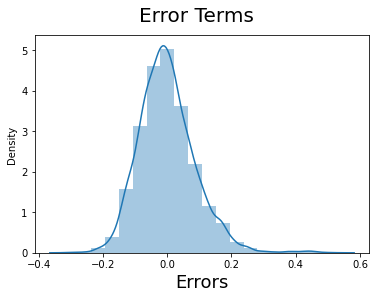

In [106]:

import seaborn as sns
y_train_price = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()

num_vars = ['year', 'price', 'mileage', 'tax', 'mpg','engineSize']
df_test[num_vars] = scaler2.fit_transform(df_test[num_vars])

df_test

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
7817,0.857143,0.633158,0.104965,0.604167,0.453532,0.434783,0,1,0,1,0,0,0,0,1
13328,0.857143,0.525088,0.149315,0.625000,0.858736,0.652174,0,1,0,1,0,0,0,0,0
10003,0.857143,0.676916,0.018118,0.604167,0.280669,0.434783,0,1,0,1,0,0,0,0,1
7379,0.571429,0.370311,0.283293,0.520833,0.314126,0.434783,0,1,0,0,0,1,0,0,1
2930,0.428571,0.108591,0.351182,0.000000,0.641264,0.434783,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,0.714286,0.349495,0.133102,0.604167,0.453532,0.434783,1,0,0,1,0,0,0,0,1
2369,0.714286,0.199879,0.204955,0.604167,0.639405,0.434783,0,0,0,1,0,0,0,0,1
11363,0.571429,0.286179,0.192156,0.000000,0.579926,0.434783,1,0,0,1,0,0,0,0,1
11388,0.714286,0.329546,0.409721,0.604167,0.579926,0.434783,1,0,0,1,0,0,0,0,1


In [108]:
y_test = df_test.pop('price')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["Other_1", "engineSize", "Manual","Semi-Auto","Other_2","year","mpg"], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_2.predict(X_test_m4)

In [109]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.6684680997529715

In [110]:
# Dropping highly correlated variables and insignificant variables
X7 = X6.drop('mpg', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X7)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2608.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:33:45   Log-Likelihood:                 10036.
No. Observations:                9986   AIC:                        -2.006e+04
Df Residuals:                    9978   BIC:                        -2.000e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2452      0.004     54.584      0.0

In [111]:
# Multiple Regression Equation

# y'(price) = .25 + (-.33)mileage + (.15)tax +  (.12)Fiesta + (.24)Focus + (.10)Yaris + (.11)Hybrid + (-.03)Petrol

.25 + (-.33)*1 + (.15)*1 +  (.12)*1 + (.24)*0 + (.10)*0 + (.11)*0 + (-.03)*0


0.18999999999999997